In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [131]:
df = pd.read_csv("student1.csv")

In [132]:
df.head()

,name,gmat,gpa,exp,admitted,country
0,samir,780,4.0,3,1,Ind
1,kaushal,750,3.9,4,1,Ind
2,nandan,690,3.3,3,0,Ind
3,ankit,710,3.7,5,1,us
4,deepika,680,3.9,4,0,Ind


In [133]:
df.drop(['name','country'],axis =1,inplace=True)

In [134]:
df.head()

,gmat,gpa,exp,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [135]:
df.shape

(42, 4)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gmat      42 non-null     int64  
 1   gpa       42 non-null     float64
 2   exp       42 non-null     int64  
 3   admitted  42 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.4 KB


In [137]:
df.isnull().sum()

gmat        0
gpa         0
exp         0
admitted    0
dtype: int64

In [138]:
x = df.drop('admitted',axis=1)

In [139]:
y = df.admitted

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [142]:
X_train.shape

(33, 3)

In [143]:
X_test.shape

(9, 3)

In [144]:
from sklearn.neighbors import KNeighborsClassifier

In [145]:
model =  KNeighborsClassifier(n_neighbors=3)

In [146]:
model.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=3)

In [147]:
model.score(X_test,y_test)

0.6666666666666666

In [148]:
y_test

25    1
13    0
8     1
26    1
4     0
39    1
19    0
29    1
30    0
Name: admitted, dtype: int64

In [149]:
pred = model.predict(X_test)
pred 

array([1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [150]:
model.predict([[750, 3.8, 4]])

array([1], dtype=int64)

In [151]:
score = []
for i in range(2, 20):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    accuracy = model.score(X_test,y_test)
    score.append( accuracy)

In [152]:
score

[0.7777777777777778,
 0.6666666666666666,
 0.7777777777777778,
 0.6666666666666666,
 0.5555555555555556,
 0.6666666666666666,
 0.8888888888888888,
 0.6666666666666666,
 0.7777777777777778,
 0.6666666666666666,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778,
 0.7777777777777778]

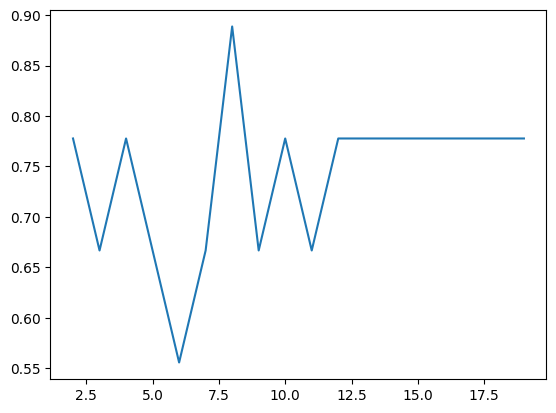

In [153]:
plt.plot(range(2,20),score)
plt.show()

In [155]:
from sklearn.metrics import confusion_matrix

In [156]:
cm = confusion_matrix(y_test , pred)

In [157]:
import seaborn as sns

<Axes: >

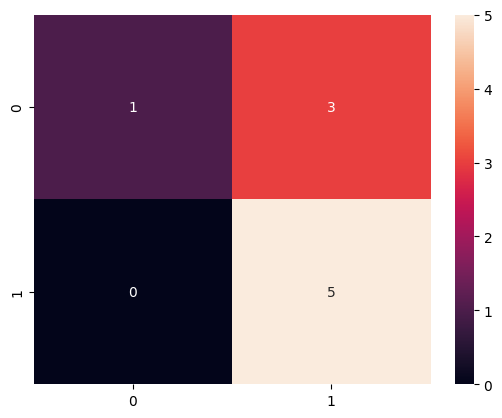

In [159]:
sns.heatmap(cm,annot=True)